In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_bars(datasets, random_prob, mask_ratio, z_lims, z_ticks, titles):
    """
    生成1 行 N 列的三维柱状图网格（N 为任务数量，示例中为 3 列），每个子图对应一个任务，展示性能指标随两个变量的变化关系

    参数:
        datasets:列表， 每个元素为二维数组（shape 与random_prob×mask_ratio对应），代表一个任务的性能数据
        random_prob: 一维数组，表示 Y 轴的变量取值
        mask_ratio: 一维数组，表示 X 轴的变量取值
        z_lims: 列表，每个元素为(min, max)元组，长度与任务数量一致，定义每个子图的 Z 轴范围
        z_ticks: 列表，每个元素为 Z 轴刻度数组，长度与任务数量一致，定义每个子图的 Z 轴刻度
        titles: 列表，每个元素为子图标题，长度与任务数量一致
        
    配色：cmap='viridis'
    """
    fig = plt.figure(figsize=(6 * len(datasets), 6))

    def create_3d_bar(ax, data, z_lim, z_ticks, title,
                  random_prob, mask_ratio,
                  cmap='viridis'):
        """
        在给定 ax 上绘制 3D 柱状图
        """
        data = data.T
        y, x = np.meshgrid(np.arange(len(random_prob)), np.arange(len(mask_ratio)))
    
        dx = dy = 0.8
        colors = plt.cm.get_cmap(cmap)(np.linspace(0, 1, len(mask_ratio)))
    
        # 添加底部平面
        ax.plot_surface(x, y, np.full_like(data, z_lim[0]),
                        color='gray', alpha=0.3)
    
        # 绘制柱子
        for i in range(len(mask_ratio)):
            for j in range(len(random_prob)):
                ax.bar3d(x[i, j], y[i, j], z_lim[0],
                         dx, dy, data[i, j] - z_lim[0],
                         color=colors[i], alpha=1)
    
        ax.set_xticks(np.arange(len(mask_ratio)) + 0.4)
        ax.set_yticks(np.arange(len(random_prob)) + 0.4)
        ax.set_xticklabels(mask_ratio, fontsize=12)
        ax.set_yticklabels(random_prob, fontsize=12)
        ax.set_xlabel('Local Ratio', fontsize=14)
        ax.set_ylabel('Regional Ratio', fontsize=14)
        ax.set_zlabel('R²', fontsize=14, rotation=90)
    
        ax.set_zlim(z_lim)
        ax.set_zticks(z_ticks)
    
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.view_init(elev=30, azim=45)
        ax.tick_params(axis='z', labelsize=10)
        ax.set_title(title, fontsize=16)
    
    for i, data in enumerate(datasets):
        ax = fig.add_subplot(1, len(datasets), i + 1, projection='3d')
        create_3d_bar(ax, data,
                      z_lims[i], z_ticks[i], titles[i],
                      random_prob, mask_ratio)

    plt.tight_layout()
    plt.savefig('Chi_mask.pdf', format='pdf')
    plt.show()
    print(f"PDF 文件已保存为 '{'Chi_mask.pdf'}'")


C:\Users\86198\AppData\Local\Temp\ipykernel_8612\2041796067.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0, 1, len(mask_ratio)))
C:\Users\86198\AppData\Local\Temp\ipykernel_8612\2041796067.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(np.linspace(0, 1, len(mask_ratio)))
C:\Users\86198\AppData\Local\Temp\ipykernel_8612\2041796067.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` inst

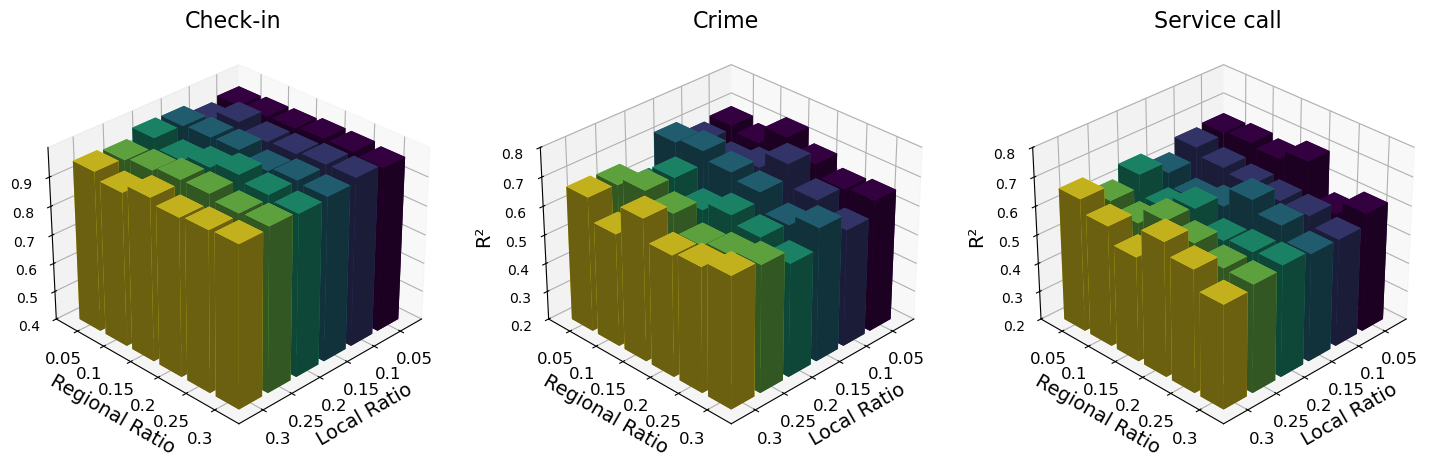

PDF 文件已保存为 'Chi_mask.pdf'


In [2]:
#示例：
# 数据
random_prob = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
mask_ratio = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3])

# 数据
checkIn = np.array([
    [0.959, 0.945, 0.975, 0.978, 0.948, 0.955],
    [0.964, 0.989, 0.980, 0.947, 0.959, 0.931],
    [0.967, 0.965, 0.983, 0.969, 0.974, 0.962],
    [0.976, 0.969, 0.957, 0.991, 0.975, 0.944],
    [0.976, 0.979, 0.972, 0.971, 0.958, 0.952],
    [0.968, 0.981, 0.965, 0.957, 0.964, 0.956]
])

crime = np.array([
    [0.689, 0.677, 0.719, 0.603, 0.663, 0.668],
    [0.672, 0.651, 0.734, 0.688, 0.691, 0.591],
    [0.736, 0.677, 0.707, 0.625, 0.661, 0.693],
    [0.689, 0.735, 0.686, 0.656, 0.602, 0.619],
    [0.649, 0.659, 0.622, 0.630, 0.619, 0.631],
    [0.657, 0.605, 0.661, 0.591, 0.638, 0.653]
])

serviceCall = np.array([
    [0.664, 0.657, 0.613, 0.653, 0.609, 0.662],
    [0.672, 0.631, 0.568, 0.581, 0.580, 0.618],
    [0.662, 0.618, 0.590, 0.630, 0.637, 0.562],
    [0.698, 0.609, 0.660, 0.569, 0.610, 0.664],
    [0.564, 0.605, 0.621, 0.580, 0.576, 0.623],
    [0.613, 0.573, 0.574, 0.586, 0.573, 0.558]
])

datasets = [checkIn, crime, serviceCall]
#每个子图的 z 轴范围
z_lims = [(0.4, 1.0), (0.2, 0.8), (0.2, 0.7)]
#每个子图的 z 轴刻度
z_ticks = [np.arange(0.4, 1.0, 0.1),
           np.arange(0.2, 0.8, 0.1),
           np.arange(0.2, 0.8, 0.1)]
#每个子图的标题
titles = ['Check-in', 'Crime', 'Service call']

plot_3d_bars(datasets, random_prob, mask_ratio,
             z_lims, z_ticks, titles)
